![](2022-11-18-19-49-38.png)

# RNN Syntax Basics

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

## Creating Data

In [2]:
X = np.linspace(0,50,501)
y = np.sin(X)

In [3]:
X

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [4]:
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

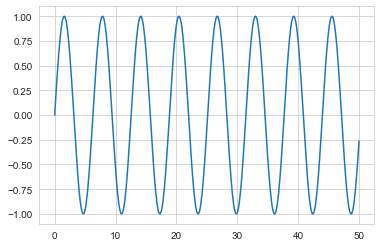

In [5]:
plt.plot(X,y);

Let's turn this into a DataFrame

In [6]:
df = pd.DataFrame(data = y , index = X , columns=['sin(X)'])

In [7]:
df

,sin(X)
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


## Preprocessing of Data

### Train Test Split

In [8]:
len(df)

501

In [9]:
test_percent = 0.15

In [10]:
len(df)*test_percent

75.14999999999999

In [11]:
test_point = np.round(len(df)*test_percent)
test_point

75.0

In [12]:
test_ind = int(len(df) - test_point)
test_ind

426

In [13]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [14]:
train

,sin(X)
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
42.100,-0.952
42.200,-0.978
42.300,-0.994
42.400,-1.000


In [15]:
test

,sin(X)
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


### Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
#help(TimeseriesGenerator)

In [21]:
# Define generator
length = 2 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
stride = 1 # Period between successive output sequences
generator = TimeseriesGenerator(data = train_scaled,
                                targets = train_scaled,
                                length = length,
                                batch_size = batch_size,
                                stride = stride)

In [22]:
len(train_scaled)

426

In [23]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 

424

In [24]:
generator

In [25]:
generator[0]

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [26]:
# What does the first batch look like?
X, y = generator[0]

In [27]:
print(f'Given the Array: \n{X}')
print(f'Predict this y: \n{y}')

Given the Array: 
[[[0.49999912]
  [0.54991622]]]
Predict this y: 
[[0.59933458]]


In [28]:
train_scaled[:10]

array([[0.49999912],
       [0.54991622],
       [0.59933458],
       [0.64776041],
       [0.69470985],
       [0.73971381],
       [0.78232262],
       [0.82211054],
       [0.85868004],
       [0.89166571]])

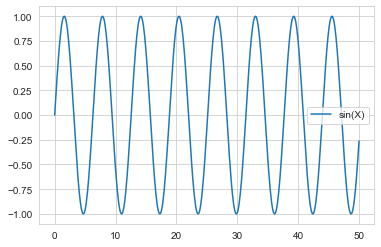

In [29]:
df.plot();

The more length the more training time

In [30]:
length = 64 # Length of the output sequences (in number of timesteps)
batch_size = 1 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

In [31]:
# What does the first batch look like?
X, y = generator[0]

In [32]:
len(generator) # = (len(train)-lenght)/(batch_size*stride) 

362

In [33]:
X

array([[[4.99999116e-01],
        [5.49916225e-01],
        [5.99334579e-01],
        [6.47760405e-01],
        [6.94709850e-01],
        [7.39713809e-01],
        [7.82322618e-01],
        [8.22110545e-01],
        [8.58680040e-01],
        [8.91665714e-01],
        [9.20737985e-01],
        [9.45606372e-01],
        [9.66022399e-01],
        [9.81782075e-01],
        [9.92727935e-01],
        [9.98750612e-01],
        [9.99789928e-01],
        [9.95835500e-01],
        [9.86926839e-01],
        [9.73152957e-01],
        [9.54651478e-01],
        [9.31607263e-01],
        [9.04250562e-01],
        [8.72854714e-01],
        [8.37733417e-01],
        [7.99237589e-01],
        [7.57751870e-01],
        [7.13690771e-01],
        [6.67494535e-01],
        [6.19624741e-01],
        [5.70559686e-01],
        [5.20789614e-01],
        [4.70811810e-01],
        [4.21125636e-01],
        [3.72227539e-01],
        [3.24606094e-01],
        [2.78737119e-01],
        [2.35078919e-01],
        [1.9

In [34]:
y

array([[0.55827419]])

In [35]:
print(f'Given the Array: \n{X.flatten()}') # Flatten for only better visulization.
print(f'Predict this y: \n{y}')

Given the Array: 
[4.99999116e-01 5.49916225e-01 5.99334579e-01 6.47760405e-01
 6.94709850e-01 7.39713809e-01 7.82322618e-01 8.22110545e-01
 8.58680040e-01 8.91665714e-01 9.20737985e-01 9.45606372e-01
 9.66022399e-01 9.81782075e-01 9.92727935e-01 9.98750612e-01
 9.99789928e-01 9.95835500e-01 9.86926839e-01 9.73152957e-01
 9.54651478e-01 9.31607263e-01 9.04250562e-01 8.72854714e-01
 8.37733417e-01 7.99237589e-01 7.57751870e-01 7.13690771e-01
 6.67494535e-01 6.19624741e-01 5.70559686e-01 5.20789614e-01
 4.70811810e-01 4.21125636e-01 3.72227539e-01 3.24606094e-01
 2.78737119e-01 2.35078919e-01 1.94067715e-01 1.56113277e-01
 1.21594831e-01 9.08572769e-02 6.42077324e-02 4.19124713e-02
 2.41942605e-02 1.12301346e-02 3.14962674e-03 3.34747619e-05
 1.91281421e-03 8.76886734e-03 2.05331307e-02 3.70880598e-02
 5.82682430e-02 8.38620552e-02 1.13613771e-01 1.47226122e-01
 1.84363264e-01 2.24654135e-01 2.67696162e-01 3.13059283e-01
 3.60290246e-01 4.08917133e-01 4.58454081e-01 5.08406134e-01]
Predi

## Modelling

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [37]:
# We're only using one feature in our time series
n_features = 1

In [38]:
# define model
model = Sequential()

# Simple RNN layer
model.add(SimpleRNN(units = 100, activation = "tanh", input_shape=(length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [40]:
# total_params = 1 * ((size_of_input + 1) * size_of_output + size_of_output^2)
1 * ((1+1)*100+(100**2)) # Last dense params not added.

10200

In [41]:
model.fit(generator , epochs = 7);

Epoch 1/7
362/362 [==============================] - 3s 7ms/step - loss: 0.0061
Epoch 2/7
362/362 [==============================] - 3s 8ms/step - loss: 2.1439e-04
Epoch 3/7
362/362 [==============================] - 3s 7ms/step - loss: 1.6734e-04
Epoch 4/7
362/362 [==============================] - 2s 6ms/step - loss: 4.9636e-05
Epoch 5/7
362/362 [==============================] - 3s 7ms/step - loss: 3.2285e-04
Epoch 6/7
362/362 [==============================] - 2s 7ms/step - loss: 2.3780e-04
Epoch 7/7
362/362 [==============================] - 3s 7ms/step - loss: 1.1915e-05


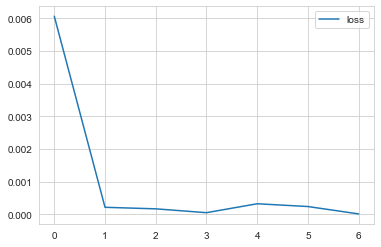

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

## Evaluate on Test Data

In [43]:
first_eval_batch = train_scaled[-length:]

In [44]:
first_eval_batch.shape

(64, 1)

In [45]:
generator[0][0].shape # We need our batch with this shape.

(1, 64, 1)

In [46]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features)) # first_eval_batch = np.expand_dims(first_eval_batch, axis=0)
first_eval_batch.shape

(1, 64, 1)

In [47]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 125ms/step


array([[0.0083465]], dtype=float32)

In [48]:
test_scaled[0] # Almost same.

array([0.00885189])

In [49]:
test_predictions = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [50]:
current_batch.shape

(1, 64, 1)

In [51]:
current_batch

array([[[1.27922981e-03],
        [7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.7

In [52]:
np.append(current_batch[:,1:,:], [[[0.0085]]], axis = 1) # We update our current batch. We delete first value and we add our last predict. We still have same length(64) batch.

array([[[7.34597031e-03],
        [1.83351382e-02],
        [3.41369333e-02],
        [5.45934694e-02],
        [7.95003514e-02],
        [1.08608718e-01],
        [1.41627728e-01],
        [1.78227467e-01],
        [2.18042242e-01],
        [2.60674236e-01],
        [3.05697486e-01],
        [3.52662133e-01],
        [4.01098922e-01],
        [4.50523890e-01],
        [5.00443198e-01],
        [5.50358069e-01],
        [5.99769769e-01],
        [6.48184595e-01],
        [6.95118799e-01],
        [7.40103433e-01],
        [7.82689024e-01],
        [8.22450070e-01],
        [8.58989293e-01],
        [8.91941605e-01],
        [9.20977757e-01],
        [9.45807630e-01],
        [9.66183132e-01],
        [9.81900676e-01],
        [9.92803220e-01],
        [9.98781828e-01],
        [9.99776764e-01],
        [9.95778087e-01],
        [9.86825751e-01],
        [9.73009203e-01],
        [9.54466495e-01],
        [9.31382900e-01],
        [9.03989060e-01],
        [8.72558686e-01],
        [8.3

### Final For Loop to predict step by step 

In [53]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 19ms/step


In [54]:
predictions_scaled

[array([0.0083465], dtype=float32),
 array([0.01952335], dtype=float32),
 array([0.0352839], dtype=float32),
 array([0.05550911], dtype=float32),
 array([0.0800133], dtype=float32),
 array([0.10868552], dtype=float32),
 array([0.1412735], dtype=float32),
 array([0.17756039], dtype=float32),
 array([0.21723415], dtype=float32),
 array([0.2600452], dtype=float32),
 array([0.30572268], dtype=float32),
 array([0.35384005], dtype=float32),
 array([0.40413398], dtype=float32),
 array([0.4561453], dtype=float32),
 array([0.5095188], dtype=float32),
 array([0.5636589], dtype=float32),
 array([0.61806804], dtype=float32),
 array([0.67210513], dtype=float32),
 array([0.7251069], dtype=float32),
 array([0.77641505], dtype=float32),
 array([0.8253904], dtype=float32),
 array([0.871318], dtype=float32),
 array([0.9135354], dtype=float32),
 array([0.95141697], dtype=float32),
 array([0.9844426], dtype=float32),
 array([1.0121646], dtype=float32),
 array([1.0342042], dtype=float32),
 array([1.0503331

In [55]:
test_scaled

array([[8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],
       [5.58715219e-01],
       [6.07993616e-01],
       [6.56192968e-01],
       [7.02831682e-01],
       [7.47443761e-01],
       [7.89583454e-01],
       [8.28829716e-01],
       [8.64790412e-01],
       [8.97106234e-01],
       [9.25454293e-01],
       [9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],


## Inverse Transformations and Comparing

In [56]:
predictions = scaler.inverse_transform(predictions_scaled)

In [57]:
predictions

array([[-0.98329734],
       [-0.96094381],
       [-0.92942297],
       [-0.88897287],
       [-0.83996488],
       [-0.78262092],
       [-0.71744548],
       [-0.64487228],
       [-0.56552539],
       [-0.47990398],
       [-0.38854975],
       [-0.29231578],
       [-0.19172874],
       [-0.08770695],
       [ 0.01903922],
       [ 0.12731853],
       [ 0.23613595],
       [ 0.34420927],
       [ 0.45021194],
       [ 0.55282743],
       [ 0.65077734],
       [ 0.74263177],
       [ 0.82706596],
       [ 0.90282846],
       [ 0.96887918],
       [ 1.02432273],
       [ 1.06840168],
       [ 1.10065922],
       [ 1.12081878],
       [ 1.12877522],
       [ 1.12460412],
       [ 1.10863068],
       [ 1.08117605],
       [ 1.04273684],
       [ 0.99387204],
       [ 0.93526767],
       [ 0.86754661],
       [ 0.79152769],
       [ 0.70789387],
       [ 0.61749903],
       [ 0.52114269],
       [ 0.41969878],
       [ 0.31405851],
       [ 0.20519853],
       [ 0.09408838],
       [-0

In [58]:
test

,sin(X)
42.600,-0.982
42.700,-0.959
42.800,-0.925
42.900,-0.883
43.000,-0.832
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


In [59]:
test['RNN_Predictions'] = predictions

C:\Users\EmincanY\AppData\Local\Temp\ipykernel_4620\1546111161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['RNN_Predictions'] = predictions


In [60]:
test

,sin(X),RNN_Predictions
42.600,-0.982,-0.983
42.700,-0.959,-0.961
42.800,-0.925,-0.929
42.900,-0.883,-0.889
43.000,-0.832,-0.840
...,...,...
49.600,-0.617,-0.504
49.700,-0.536,-0.415
49.800,-0.449,-0.324
49.900,-0.357,-0.233


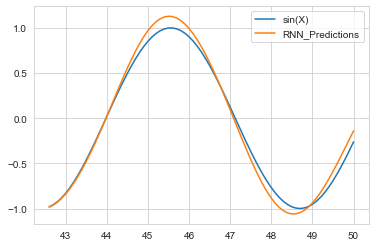

In [61]:
test.plot();

## Early Stopping and Validation Generator

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [64]:
length = 64 # lenght range have to be shorter than range of test data
            # In this case lenght range = 64, test range = 75
batch_size =1

generator = TimeseriesGenerator(data = train_scaled, targets = train_scaled, length = length, batch_size = batch_size)

validation_generator = TimeseriesGenerator(data = test_scaled, targets = test_scaled, length = length, batch_size = batch_size)

In [65]:
len(validation_generator)

11

![](2022-11-18-20-51-58.png)

## LSTM

In [66]:
# define model
model = Sequential()

# LSTM layer
model.add(LSTM(units = 100, activation = "tanh", input_shape = (length, n_features)))

# Final Prediction
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mse')

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [68]:
# params = 4 * ((size_of_input + 1) * size_of_output + size_of_output^2)
4 * ((1+1)*100+(100**2))

40800

In [69]:
model.fit(generator,
        validation_data = validation_generator,
        epochs = 20,
        callbacks = [early_stop]);

Epoch 1/20
362/362 [==============================] - 8s 17ms/step - loss: 0.0082 - val_loss: 2.9314e-05
Epoch 2/20
362/362 [==============================] - 5s 15ms/step - loss: 8.8971e-04 - val_loss: 1.5448e-05
Epoch 3/20
362/362 [==============================] - 6s 16ms/step - loss: 7.1573e-05 - val_loss: 1.2975e-05
Epoch 4/20
362/362 [==============================] - 6s 16ms/step - loss: 6.3829e-05 - val_loss: 1.3706e-05
Epoch 5/20
362/362 [==============================] - 5s 15ms/step - loss: 7.7647e-04 - val_loss: 1.5430e-05


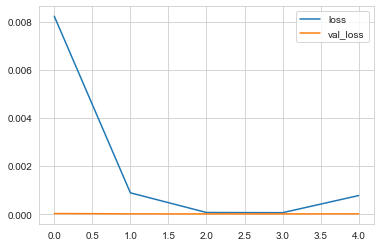

In [70]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [71]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 19ms/step


In [72]:
predictions = scaler.inverse_transform(predictions_scaled)

test['LSTM Predictions'] = predictions
test

C:\Users\EmincanY\AppData\Local\Temp\ipykernel_4620\4078338873.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = predictions


,sin(X),RNN_Predictions,LSTM Predictions
42.600,-0.982,-0.983,-0.974
42.700,-0.959,-0.961,-0.950
42.800,-0.925,-0.929,-0.917
42.900,-0.883,-0.889,-0.874
43.000,-0.832,-0.840,-0.824
...,...,...,...
49.600,-0.617,-0.504,-0.623
49.700,-0.536,-0.415,-0.547
49.800,-0.449,-0.324,-0.466
49.900,-0.357,-0.233,-0.380


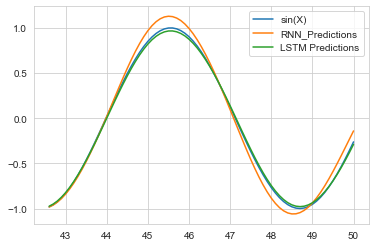

In [73]:
test.plot();

## Retrain and Forecasting

In [74]:
full_scaler = MinMaxScaler()

scaled_full_data = full_scaler.fit_transform(df)

In [75]:
length = 64 

generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = 1)

In [76]:
model = Sequential()

model.add(LSTM(100, input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit(generator, epochs = 6)

Epoch 1/6


C:\Users\EmincanY\AppData\Local\Temp\ipykernel_4620\2292504718.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 6)


437/437 [==============================] - 8s 14ms/step - loss: 0.0064
Epoch 2/6
437/437 [==============================] - 5s 11ms/step - loss: 3.1142e-04
Epoch 3/6
437/437 [==============================] - 5s 11ms/step - loss: 6.3426e-05
Epoch 4/6
437/437 [==============================] - 5s 12ms/step - loss: 5.5363e-04
Epoch 5/6
437/437 [==============================] - 5s 12ms/step - loss: 7.8836e-05
Epoch 6/6
437/437 [==============================] - 5s 12ms/step - loss: 3.3067e-05


In [77]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead 
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

1/1 [==============================] - 0s 19ms/step


In [78]:
forecast = scaler.inverse_transform(forecast)

In [79]:
forecast

array([[-0.1673867 ],
       [-0.06726886],
       [ 0.03385002],
       [ 0.13496456],
       [ 0.23504913],
       [ 0.33306449],
       [ 0.42797745],
       [ 0.51877295],
       [ 0.60447611],
       [ 0.68416378],
       [ 0.75698362],
       [ 0.82216626],
       [ 0.87903937],
       [ 0.92703395],
       [ 0.96569143],
       [ 0.99466692],
       [ 1.01372917],
       [ 1.02275514],
       [ 1.02172614],
       [ 1.01072011],
       [ 0.98990729],
       [ 0.95953682],
       [ 0.91993331],
       [ 0.87148895],
       [ 0.81466102],
       [ 0.7499644 ],
       [ 0.67797294],
       [ 0.59931665],
       [ 0.51468661],
       [ 0.42482939],
       [ 0.33055205],
       [ 0.23272159],
       [ 0.13226186],
       [ 0.03015051],
       [-0.07258889],
       [-0.1748979 ],
       [-0.27569629],
       [-0.37389868],
       [-0.46843453],
       [-0.55826614],
       [-0.64241003],
       [-0.71995323],
       [-0.79007031],
       [-0.85203443],
       [-0.90522617],
       [-0

In [80]:
df

,sin(X)
0.000,0.000
0.100,0.100
0.200,0.199
0.300,0.296
0.400,0.389
...,...
49.600,-0.617
49.700,-0.536
49.800,-0.449
49.900,-0.357


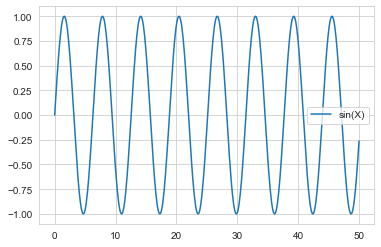

In [81]:
df.plot();

In [82]:
forecast_len = len(forecast)
forecast_len

64

In [83]:
step = 0.1

In [84]:
forecast_len * step

6.4

In [85]:
forecast_index = np.arange(50.1, 56.5, step = step)

In [86]:
len(forecast_index)

64

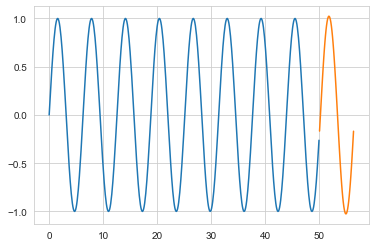

In [90]:
plt.plot(df.index, df['sin(X)'])

plt.plot(forecast_index, forecast);

In [ ]:
# Done